# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [ ]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Crear dataset.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.069904,1.639384,-0.519130,-0.135421,1.741973,55.131693
1,0.397190,1.900319,-1.577817,1.553780,-0.670773,103.075605
2,0.245967,-1.810160,-0.450099,0.284742,-0.900363,-47.050665
3,-0.452721,1.045311,0.133533,-0.593448,0.104730,1.723666
4,-0.571151,-1.026566,-0.973224,0.108225,-1.529652,-84.888594


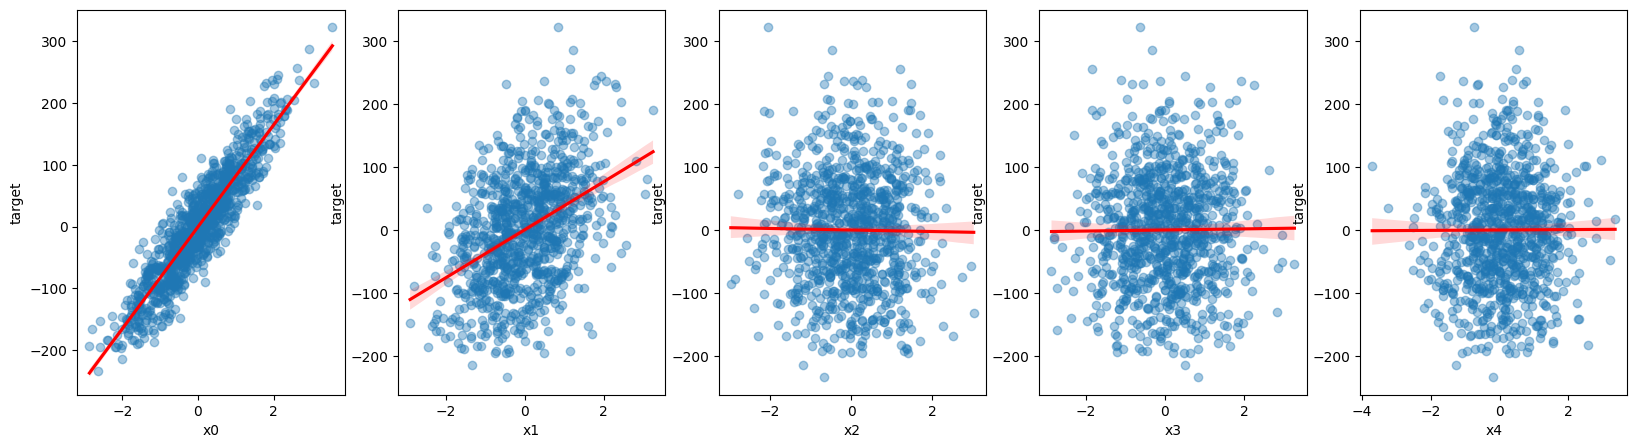

In [ ]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)



Ahora agregamos _outliers_ a un nuevo dataset

In [ ]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [ ]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

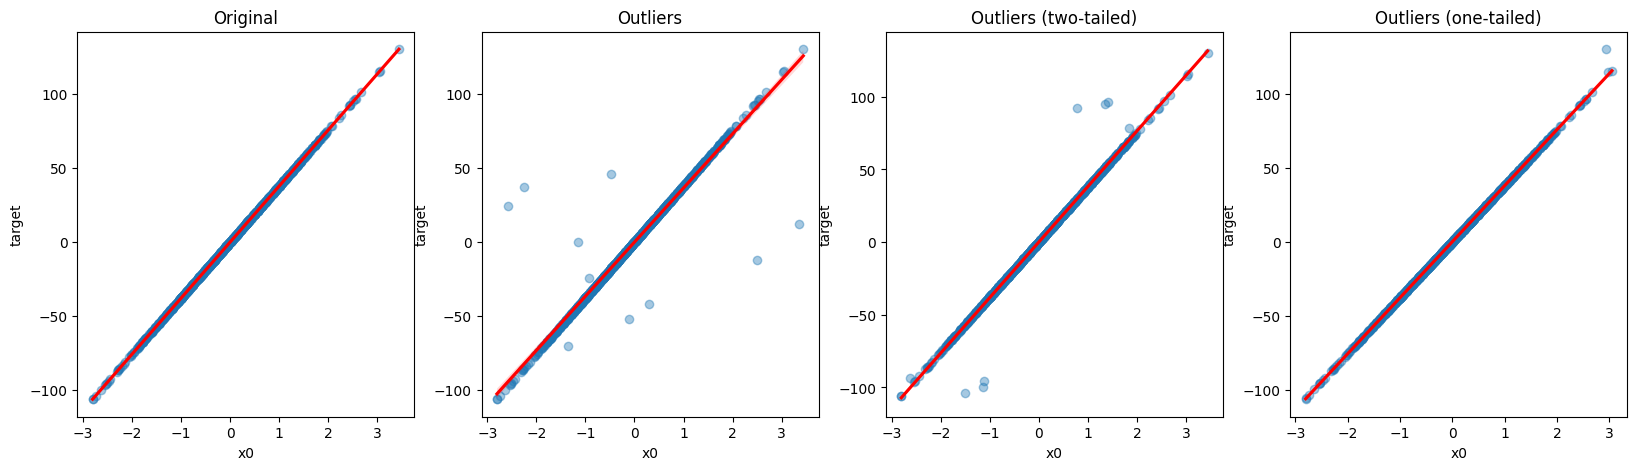

In [ ]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

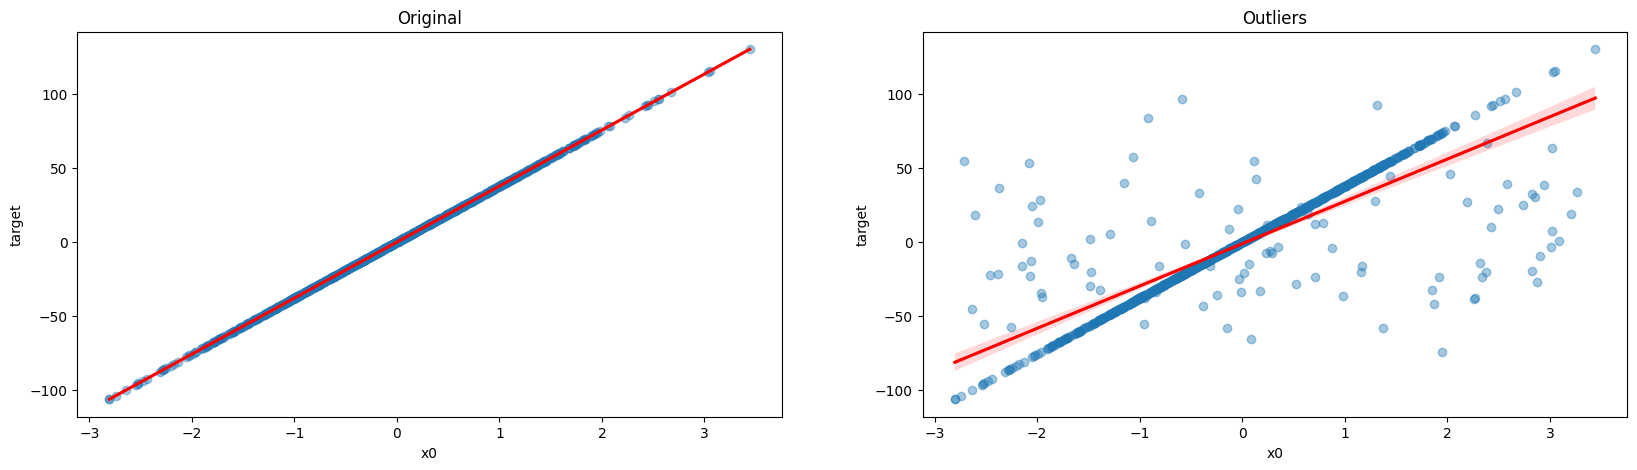

In [ ]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test.


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [ ]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from tabulate import tabulate

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
## Parámetros de la simulación
## Le baje el numero de experimentos, los parametros de noise and bias porque se tardaba mucho
n_exp = 10
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 100, 20)
bias = np.linspace(0, 100, 20)

results=[]

In [ ]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            X = data.iloc[:,range(n_features)]
            y = data.iloc[:,-1]

            # Dividir en train-test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            # Ajustar modelo
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Validar modelo
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

            mae_train = mean_absolute_error(y_train, y_train_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)

            # Guardar resultados
            results.append({
                "coefficients": model.coef_,
                "rmse_train": rmse_train,
                "rmse_test": rmse_test,
                "mae_train": mae_train,
                "mae_test": mae_test
            })



100%|██████████| 10/10 [01:17<00:00,  7.70s/it]


In [ ]:
# Analizar coeficientes
coefficients = [res["coefficients"].ravel() for res in results]
mean_coefficients = np.mean(coefficients, axis=0)
std_coefficients = np.std(coefficients, axis=0)

mean_coefficients = pd.DataFrame(mean_coefficients)
std_coefficients = pd.DataFrame(std_coefficients)
tab = pd.concat([mean_coefficients,std_coefficients],axis=1)

print(tabulate((tab),headers=("Features","Mean Coefficients","Standard Deviation Coefficients"), tablefmt='pretty',showindex=True))


+----------+-----------------------+---------------------------------+
| Features |   Mean Coefficients   | Standard Deviation Coefficients |
+----------+-----------------------+---------------------------------+
|    0     |   49.99858219095878   |       28.851915651034922        |
|    1     |   50.37776429517753   |       28.912936918137834        |
|    2     | -0.014691971463520453 |        2.125115575185316        |
|    3     | -0.049532920471305045 |        2.073617896576196        |
|    4     | -0.013838729340344743 |       2.1543798046911613        |
|    5     | -0.024286462595404686 |        2.145372142003511        |
|    6     | -0.06673618278135872  |       2.0969948268466814        |
|    7     |  0.05646649531081095  |        2.074894974487449        |
|    8     | 0.002168079148801858  |        2.061480228070941        |
|    9     | -0.039516087831402806 |       2.0978292050987313        |
+----------+-----------------------+---------------------------------+


**En el resultado se ve que las primeras 2 features (informativas) su media y desviacion tienden a tener un valor medianamente claro, en cambio para las demas features (no informativas) su media y desviacion tienden a cero lo que da certeza que no aportan informacion importante al modelo.**

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [ ]:
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge

In [ ]:
X,y = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5)

In [ ]:
## DATASETS

data = pd.DataFrame({
    'x': X.flatten(),
    'y': y,
    })

do1 = generate_outliers(
    df=data,
    columns=['x'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
    two_tailed=False,)

do5 = generate_outliers(
    df=data,
    columns=['x'],
    percentage=0.05,
    extreme_outliers=False,
    only_tails=False,
    two_tailed=False,)

do10 = generate_outliers(
    df=data,
    columns=['x'],
    percentage=0.10,
    extreme_outliers=False,
    only_tails=False,
    two_tailed=False,)


In [ ]:
def lin_reg(dat_reg, ol_porc):
    Xr = np.array(dat_reg.x).reshape(-1, 1)
    yr = dat_reg.y

    lr = LinearRegression()
    lr.fit(Xr,yr)
    y_predr = lr.predict(Xr)

    plt.scatter(Xr, yr, color='blue', label='Datos reales')
    plt.plot(Xr, y_predr, color='red', label='Línea de regresión')
    if ol_porc == 0:
      plt.title('Regresión Lineal con datos sin Outliers')
    else:
      plt.title(f'Regresión Lineal con {ol_porc} % Outliers')
    plt.xlabel('Característica X')
    plt.ylabel('Objetivo y')
    plt.legend()
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    return


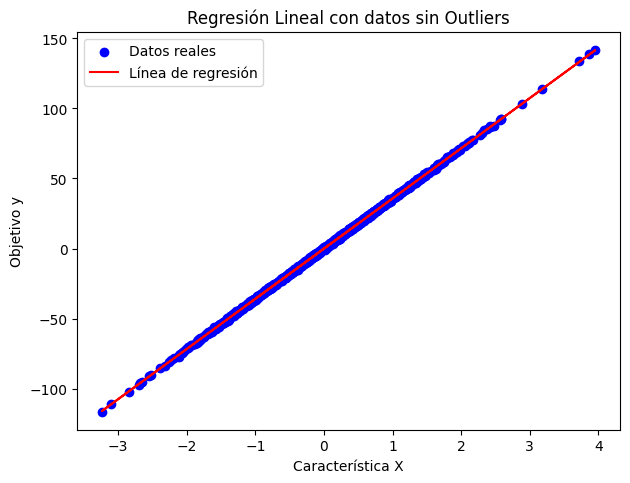

In [ ]:
lin_reg(data,0)

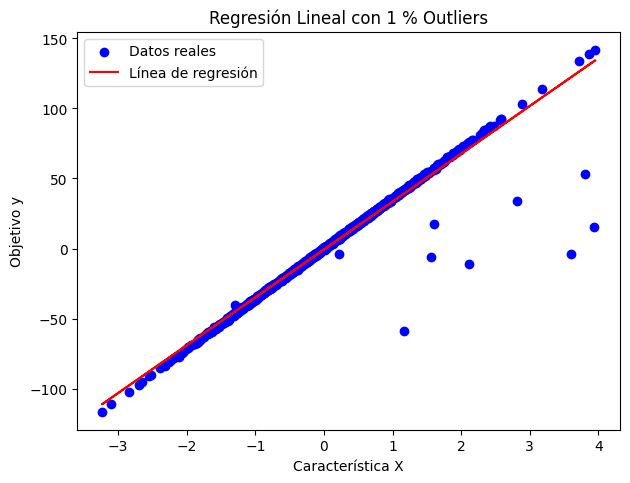

In [ ]:
lin_reg(do1,1)

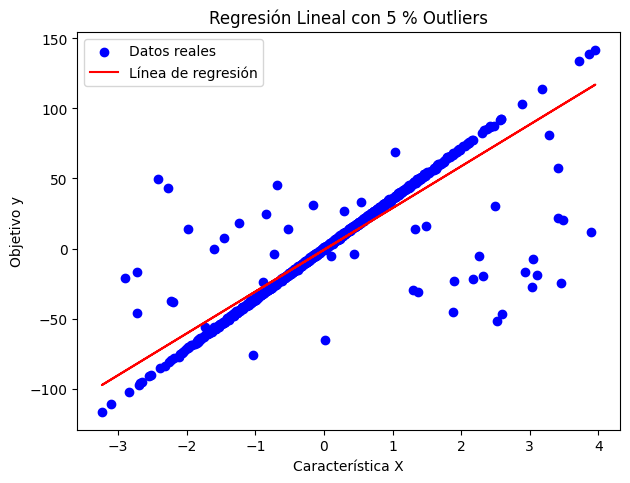

In [ ]:
lin_reg(do5,5)

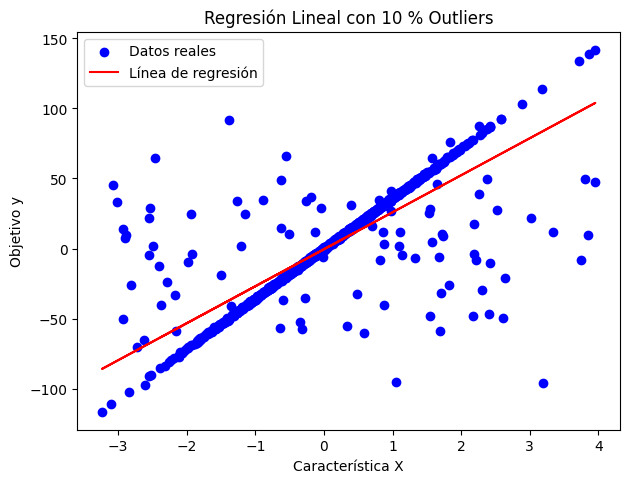

In [ ]:
lin_reg(do10,10)

In [ ]:
def hub_reg(dat_reg, ol_porc):
    Xr = np.array(dat_reg.x).reshape(-1, 1)
    yr = dat_reg.y
    huber = HuberRegressor()
    huber.fit(Xr,yr)
    y_predr = huber.predict(Xr)

    plt.scatter(Xr, yr, color='blue', label='Datos reales')
    plt.plot(Xr, y_predr, color='red', label='Línea de regresión')
    if ol_porc == 0:
      plt.title('Regresión Huber con datos sin Outliers')
    else:
      plt.title(f'Regresión Huber con {ol_porc} % Outliers')
    plt.xlabel('Característica X')
    plt.ylabel('Objetivo y')
    plt.legend()
    plt.show()

    return

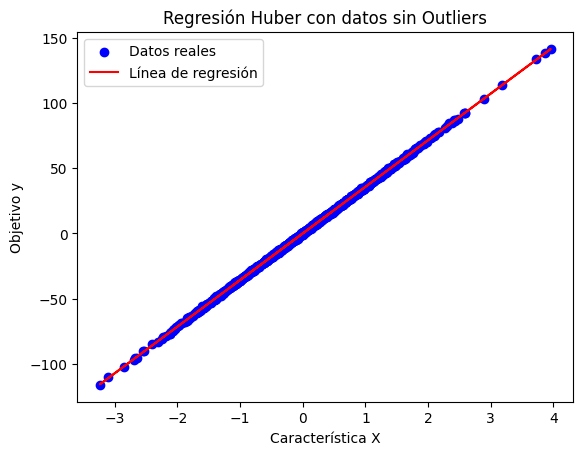

In [ ]:
hub_reg(data,0)

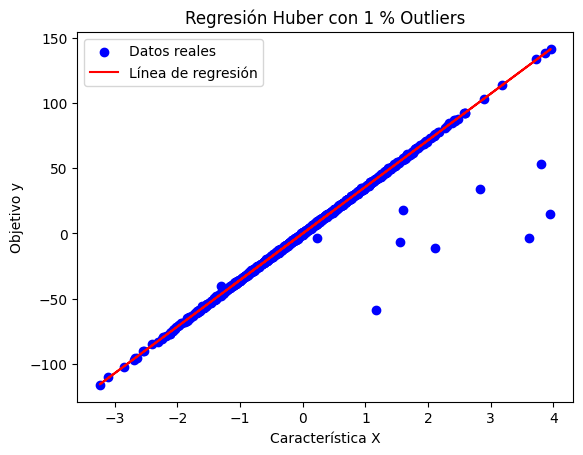

In [ ]:
hub_reg(do1,1)

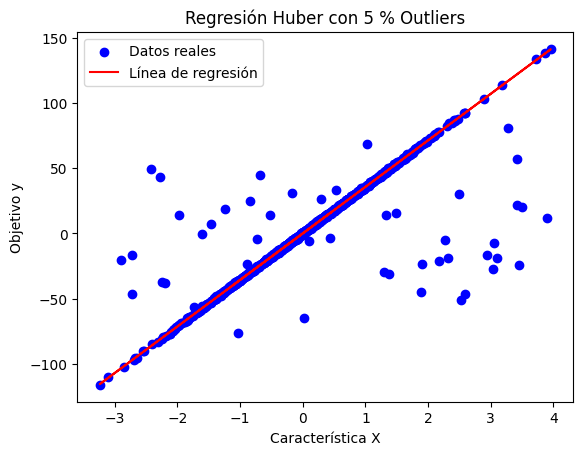

In [ ]:
hub_reg(do5,5)

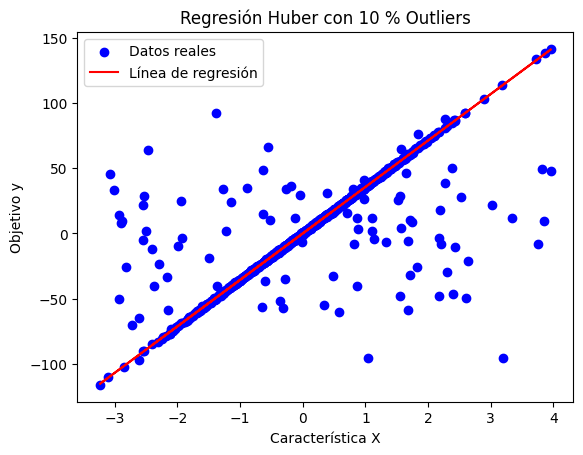

In [ ]:
hub_reg(do10,10)

In [ ]:
def ridge_reg(dat_reg, ol_porc):
    Xr = np.array(dat_reg.x).reshape(-1, 1)
    yr = dat_reg.y
    ridge = Ridge(alpha=1)
    ridge.fit(Xr,yr)
    y_predr = ridge.predict(Xr)

    plt.scatter(Xr, yr, color='blue', label='Datos reales')
    plt.plot(Xr, y_predr, color='red', label='Línea de regresión')
    if ol_porc == 0:
      plt.title('Regresión Ridge con datos sin Outliers')
    else:
      plt.title(f'Regresión Ridge con {ol_porc} % Outliers')
    plt.xlabel('Característica X')
    plt.ylabel('Objetivo y')
    plt.legend()
    plt.show()

    return

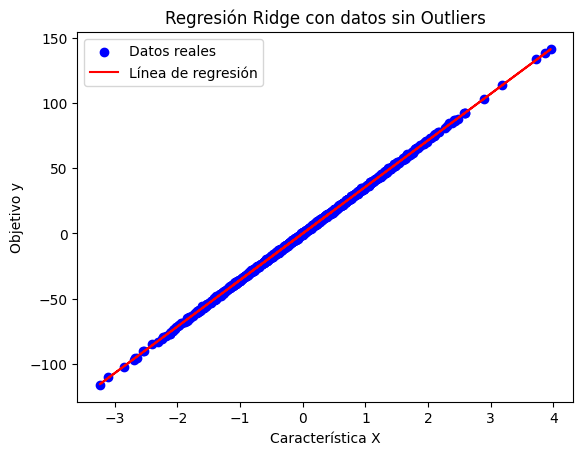

In [ ]:
ridge_reg(data,0)

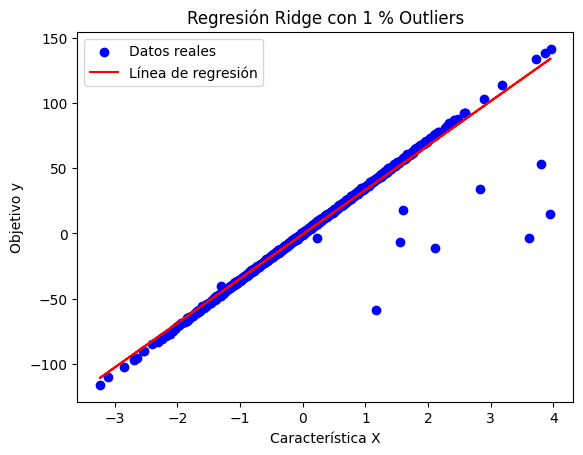

In [ ]:
ridge_reg(do1,1)

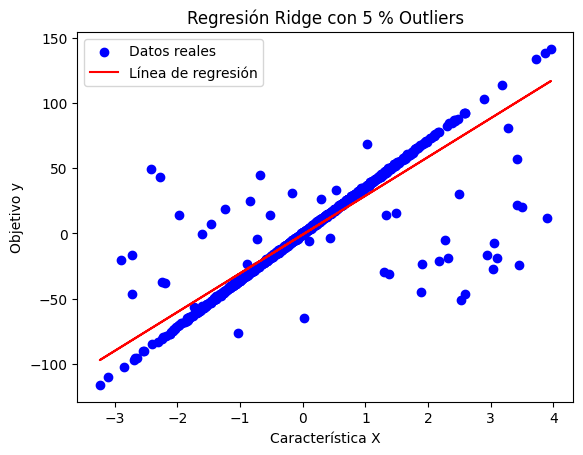

In [ ]:
ridge_reg(do5,5)

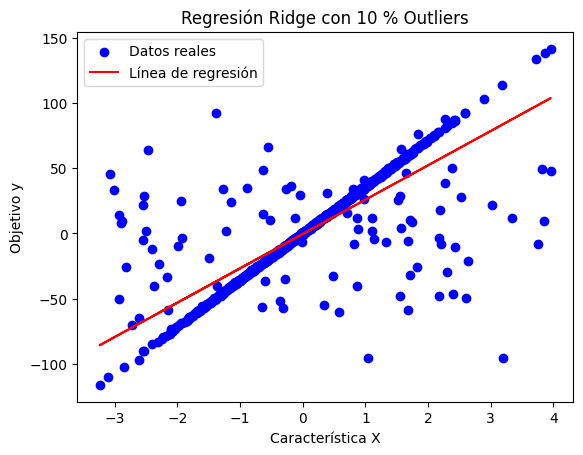

In [ ]:
ridge_reg(do10,10)

**Segun lo comprobado, la regresion Huber es mas robusta ante los outliers. La regresion Ridge tiene un parametro de regularizacion "alpha" que puede mejorar en cierta forma la insidencia de los outliers pero no asegura que el sistema sea completamente robusto ante outliers (no tanto como el Ridge al menos).**

**Por ultimo la regresion lineal simple es la mas suceptible a los outliers.**

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [ ]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [ ]:
X,y =  generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0.5,
    bias=12,
    output='array'
            )

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ones_train = np.ones(len(X_train1)).reshape(len(X_train1),1)
X2 = X_train1.reshape(len(X_train1),1)
X_train = np.concatenate((ones_train,X2),axis=1)

ones_test = np.ones(len(X_test1)).reshape(len(X_test1),1)
X2 = X_test1.reshape(len(X_test1),1)
X_test = np.concatenate((ones_test,X2),axis=1)

In [ ]:
def GD(X: np.ndarray, y: np.ndarray, learning_rate: float, max_epochs: int, tolerance: float, X_test=None, y_test=None):
    # Inicializamos el vector theta al azar
    theta = np.random.randn(X.shape[1])

    # Para guardar la función de pérdida en train y test en cada época
    train_loss_history = []
    test_loss_history = []

    for epoch in range(max_epochs):
        # Calcular gradiente
        grad = gradient(X, y, theta)

        # Actualizar parámetros
        theta -= learning_rate * grad

        # Calcular la función de pérdida en train
        train_loss = np.mean((y - X.dot(theta)) ** 2)
        train_loss_history.append(train_loss)

        # Si hay datos de prueba, calcular la función de pérdida en test
        if X_test is not None and y_test is not None:
            test_loss = np.mean((X_test.dot(theta) - y_test) ** 2)
            test_loss_history.append(test_loss)

        # Condición de frenado por tolerancia
        if epoch > 0 and np.abs(train_loss_history[-1] - train_loss_history[-2]) < tolerance:
            break

    if X_test is not None and y_test is not None:
        return theta, train_loss_history, test_loss_history, epoch
    else:
        return theta, train_loss_history, epoch

In [ ]:
# Ejecutar GD
theta_final, gd_train_loss, test_loss_history , epoch= GD(X_train, y_train, 0.01, 1000, 1e-4, X_test, y_test)
print("Theta final:", theta_final)
print("Numero de Epocas:", epoch)

Theta final: [11.97257248 45.5365025 ]
Numero de Epocas: 353


#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [ ]:
def SGD(X: np.ndarray, y: np.ndarray, learning_rate: float, max_epochs: int, tolerance: float, X_test=None, y_test=None, batch_size=1):
    # Inicializamos el vector theta al azar
    theta = np.random.randn(X.shape[1])

    # Para guardar la función de pérdida en train y test en cada época
    train_loss_history = []
    test_loss_history = []

    # Número de muestras
    m = len(y)

    for epoch in range(max_epochs):
        # Mezclar el conjunto de datos
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            # Calcular gradiente con la muestra o lote
            grad = gradient(X_i, y_i, theta)

            # Actualizar parámetros
            theta -= learning_rate * grad

        # Calcular la función de pérdida en train
        train_loss = np.mean((X.dot(theta) - y) ** 2)
        train_loss_history.append(train_loss)

        # Si hay datos de prueba, calcular la función de pérdida en test
        if X_test is not None and y_test is not None:
            test_loss = np.mean((X_test.dot(theta) - y_test) ** 2)
            test_loss_history.append(test_loss)

        # Condición de frenado por tolerancia
        if epoch > 0 and np.abs(train_loss_history[-1] - train_loss_history[-2]) < tolerance:
            break

    # Si se proporcionó el conjunto de prueba, retornar ambos historiales, si no, solo el de entrenamiento
    if X_test is not None and y_test is not None:
        return theta, train_loss_history, test_loss_history, epoch
    else:
        return theta, train_loss_history, epoch

In [ ]:
# Ejecutar SGD
# Si batch_size=1 => GSD puro
# Si batch_size=len(X) => GD puro
theta_final, sgd_train_loss, test_loss, epoch = SGD(X_train, y_train, 0.01, 1000, 1e-4, X_test, y_test, batch_size=1)
print("Theta final:", theta_final)
print("Numero de Epocas:", epoch)

Theta final: [12.01798755 45.57063331]
Numero de Epocas: 26


Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

**Si se puede ver la diferencia de SGD y GD tiende mas rapido el SGD pero tambien tiene mas ruido en el proceso, tambien usando el SGD con batch size tiende a ser menos ruidoso y con menos epocas solo que seria rentable si se tiene la posibilidad de calcular de forma paralela por ejemplo con una GPU**

**Cambiando el lr ambos algoritmos pueden realizar el calculo en mas o menos epocas, pero el SGD al ser mas ruidoso si el lr es muy bajo puede llegar a la excepcion de epocas maximas.**

**Al afectar el lr se ve afectada la convergencia del algoritmo**

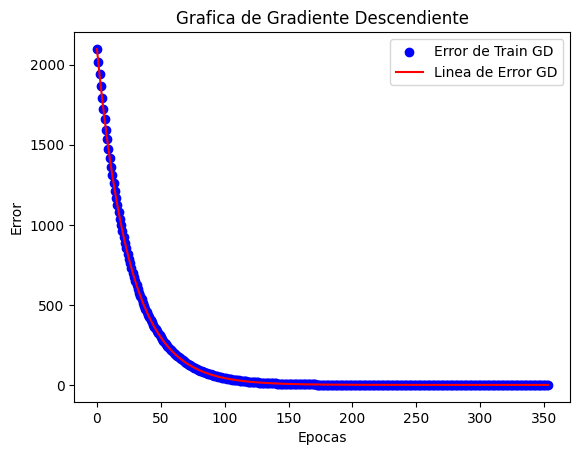

In [ ]:
plt.scatter(np.arange(len(gd_train_loss)), gd_train_loss, color='blue', label='Error de Train GD')
plt.plot(np.arange(len(gd_train_loss)), gd_train_loss, color='red', label='Linea de Error GD')
plt.title('Grafica de Gradiente Descendiente')
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.legend()
plt.show()

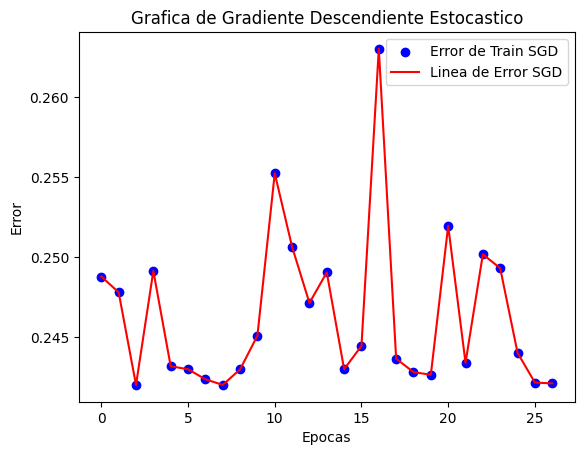

In [ ]:
plt.scatter(np.arange(len(sgd_train_loss)), sgd_train_loss, color='blue', label='Error de Train SGD')
plt.plot(np.arange(len(sgd_train_loss)), sgd_train_loss, color='red', label='Linea de Error SGD')
plt.title('Grafica de Gradiente Descendiente Estocastico')
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.legend()
plt.show()

**Depende de la aplicacion, la tolerancia de error y learning rate pueden afectar de una forma u otra a ambos modelos como mencionaba antes se ve que el SGD es mas ruidoso pero para el caso medido se comporta bastante bien porque la convergencia es casi inmediata (observar magnitud de error es pequeña). En contra parte el GD tiene una curva mucho mas continua en la mayoria de casos para el ejemplo analizado se observa que despues de aproximadamente la epoca 120, el error se mantiene estable y no mejora notablemente a pesar del numero de epocas siguientes**